## Check GPU detected or not.

In [ ]:
import torch
print(torch.__version__)  # Should print PyTorch version
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Should show NVIDIA RTX 3050

## Train License Type Detection Model using YOLOv11

In [23]:
from ultralytics import YOLO
import torch

# Ensure CUDA is used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")  # Should print "cuda"

# Load YOLO model onto GPU
model = YOLO("yolo11n.pt").to(device)

# Train the model on GPU
results = model.train(data="Type_Dataset\\vehicle dataset\data.yaml", epochs=100, imgsz=640, device=device)

Using device: cuda
New https://pypi.org/project/ultralytics/8.3.101 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=Type_Dataset\vehicle dataset\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

train: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Type_Dataset\vehicle dataset\train\labels.cache... 2100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2100/2100 [00:00<?, ?it/s]


KeyboardInterrupt: 


image 1/1 c:\Users\ADMIN\Desktop\Project_ANPR\Test_images\image_6.jpg: 416x640 1 Bike, 1 Car, 16.6ms
Speed: 3.2ms preprocess, 16.6ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


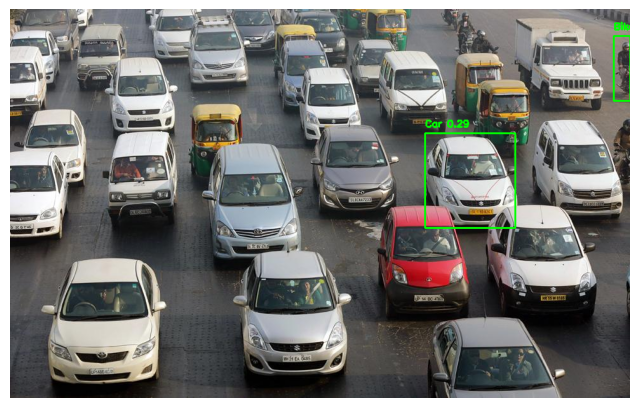

In [22]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train3\\weights\\best.pt")

image_path = "Test_images\\image_6.jpg"  # Replace with your test image path
results = model(image_path)  # Run inference


# Load image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct visualization

# Loop through detection results
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = float(box.conf[0])  # Confidence score
        cls = int(box.cls[0])  # Class index
        label = f"{model.names[cls]} {conf:.2f}"  # Label with class name & confidence

        # Draw bounding box & label on image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(8, 6)) 
plt.imshow(image)
plt.axis("off")
plt.show()


# Trained New Model

In [14]:
from ultralytics import YOLO
import torch

# Ensure CUDA is used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")  # Should print "cuda"

# Load YOLO model onto GPU
model = YOLO("yolo11n.pt").to(device)

# Train the model on GPU
results = model.train(data="Large_VC_Dataset\\data.yaml", epochs=5, imgsz=640, device=device,  optimizer="AdamW")

Using device: cuda
New https://pypi.org/project/ultralytics/8.3.101 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=Large_VC_Dataset\data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

train: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Large_VC_Dataset\train\labels.cache... 20064 images, 3 backgrounds, 0 corrupt: 100%|██████████| 20064/20064 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 34742. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Large_VC_Dataset\valid\labels.cache... 1450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1450/1450 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 2575. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.32G      1.003      1.899      1.379         64        640: 100%|██████████| 1254/1254 [03:35<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.91it/s]


                   all       1450       2575      0.341     0.0443     0.0244     0.0102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.78G     0.8454      1.549       1.26         53        640: 100%|██████████| 1254/1254 [03:23<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  6.18it/s]


                   all       1450       2575     0.0611      0.117     0.0381     0.0153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.78G     0.7593      1.378      1.194         56        640: 100%|██████████| 1254/1254 [03:54<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  4.03it/s]


                   all       1450       2575      0.147      0.134     0.0642     0.0269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.78G     0.6714      1.216      1.138         69        640: 100%|██████████| 1254/1254 [03:56<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  4.02it/s]


                   all       1450       2575      0.303      0.317      0.255      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.78G     0.6041      1.074      1.096         73        640: 100%|██████████| 1254/1254 [03:56<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  4.08it/s]


                   all       1450       2575      0.351      0.272      0.254      0.121

5 epochs completed in 0.328 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 5.5MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.98it/s]


                   all       1450       2575      0.305      0.317      0.256      0.123
                  Bike        176        309      0.114      0.485      0.272      0.117
                   Bus        243        308      0.318       0.24      0.209        0.1
                   Car        146        556      0.223      0.635      0.413      0.207
                 Hiace        376        431      0.722      0.497      0.571       0.32
              Rickshaw        305        426      0.242     0.0587     0.0673     0.0217
               Tractor        217        263      0.319      0.167      0.152     0.0559
                 Truck        219        282      0.196      0.135      0.107      0.036
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train3



image 1/1 c:\Users\ADMIN\Desktop\Project_ANPR\Test_images\image_5.jpg: 384x640 1 Bus, 17 Cars, 44.7ms
Speed: 3.6ms preprocess, 44.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


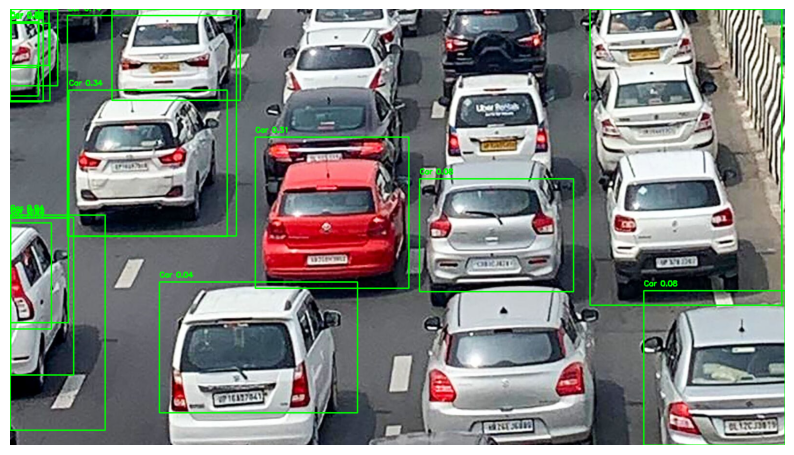

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.], device='cuda:0')
conf: tensor([0.4348, 0.4123, 0.3443, 0.3059, 0.2644, 0.2316, 0.1654, 0.1587, 0.1404, 0.1126, 0.1032, 0.0816, 0.0795, 0.0767, 0.0668, 0.0521, 0.0414, 0.0406], device='cuda:0')
data: tensor([[2.1034e+02, 0.0000e+00, 4.7536e+02, 1.8864e+02, 4.3479e-01, 2.0000e+00],
        [1.0483e+00, 0.0000e+00, 5.9607e+01, 1.2025e+02, 4.1231e-01, 2.0000e+00],
        [1.2122e+02, 1.6784e+02, 4.4836e+02, 4.6987e+02, 3.4430e-01, 2.0000e+00],
        [5.0665e+02, 2.6434e+02, 8.2303e+02, 5.7631e+02, 3.0589e-01, 2.0000e+00],
        [5.0449e-02, 2.6967e+01, 5.8843e+01, 1.7934e+02, 2.6443e-01, 2.0000e+00],
        [1.1970e+03, 0.0000e+00, 1.5932e+03, 6.1108e+02, 2.3159e-01, 1.0000e+00],
        [2.3313e+00, 0.0000e+00, 8.0798e+01, 1.1659e+02, 1.6542e-01, 2.0000e+00],
        [0.0000e+00, 0.0000e+00, 9.8411e+01, 1.5841e+02, 1.5868e-01, 2.0000e+00],
 

In [21]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train3\\weights\\best.pt")

# Path to the test image
image_path = "Test_images\\image_5.jpg"

# Run inference with a lower confidence threshold and resized input
results = model(image_path, conf=0.04, imgsz=640)

# Load image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

# Loop through detection results
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = float(box.conf[0])  # Confidence score
        cls = int(box.cls[0])  # Class index
        label = f"{model.names[cls]} {conf:.2f}"  # Label with class name & confidence

        # Draw bounding box & label on image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the detection results
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

# Debugging: Print detected objects
for result in results:
    print(result.boxes)  # Print all detected bounding boxes
